In [195]:
# 기본 분석도구

import  pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import  matplotlib as mpl
from tqdm import tqdm
import seaborn as sns
## 시각화 한글 
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 폰트
# plt.rcParams['font.family'] = 'NanumGothicCoding' # 리눅스 폰트


# 텍스트 정제 관련도구

from konlpy.tag import  Okt
import re
import konlpy
okt = Okt()
import nltk

# Word Cloud
from PIL import Image
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import string

In [6]:
cd ~/Workspace/

[Errno 2] 그런 파일이나 디렉터리가 없습니다: '/home/miwoos/Workspace/'
/home/miwoos/WorkSpace/navercafecrawling/홀푸드코리아


In [205]:
df_GMM = pd.read_csv('df_GNM자연의품격.csv')
df_청룡농원 = pd.read_csv('df_청룡농원.csv')
df_제주스 = pd.read_csv('제주스제주양배추쇼핑몰리뷰크롤링.csv')
# df = pd.read_csv('~/WorkSpace/GoogleDrive/Data/제주스제주양배추쇼핑몰리뷰크롤링.csv')

In [207]:
del df_제주스['Unnamed: 0']

In [211]:
df_제주스.내용.value_counts()

heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만.. 외할머니는 3달 동안 꾸준히 복용하고 계셔요! 식도염이나 그런 걸로 많이 고생하셨는데 즙 꾸준히 마시면서 호전된게 가장 큰3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만.. 외할머니는 3달 동안 꾸준히 복용하고 계셔요! 식도염이나 그런 걸로 많이 고생하셨는데 즙 꾸준히 마시면서 호전된게 가장 큰 요인인 것 같아요..! 혹시 주문할까 말까 고민하는 분들이 계시다면 한 번 주문해보는게 좋다고 생각합니다!요즘 바이러스가 기승이라 배달이 될까 고민했는데 주문한지 1~2일만에 빨리 도착해서 좋았어요 :) 항상 몸 조심하시고 마스크 꼭꼭 착용하고 다니세요! 좋은 건강식품 생산해주셔서 감사합니다! 사시는 동안 많이 버시고 적게 일하세요 !리뷰펼치기    2
bagw****21.03.12.빠른 배송과 무엇보다도 맛과 편리함입니다빠른 배송과 무엇보다도 맛과 편리함입니다리뷰펼치기                                                                                                                                                                                                                                                                                                                                                             2
heeh****22.02.07.맛이 좋아요. 역류성 식도염에 좋아용맛이 좋아요. 역류성 식도염에 좋아용리뷰펼치기                                                                                                        

In [204]:
df.drop(df[df.제품명 == '제주스'],inplace=True,axis=0)

KeyError: "['평점' '내용' '작성시간' '채널' '작성년월일' '내용정제' '제품명' '작성월' '키워드' '맛이있다없다' '선물관련키워드'\n '지혜스키워드'] not found in axis"

In [218]:
df_청룡농원.head(2)
df_청룡농원['내용정제'] = df_청룡농원['내용'].apply(lambda x : re.sub('[^가-힣 ]', '', x))
df_청룡농원['작성년월일']=df_청룡농원['작성시간'].apply(lambda x : x[:6])
df_청룡농원['회사명'] = '청룡농원'

In [219]:
df_GMM.head(2)
df_GMM['내용정제'] = df_GMM['내용'].apply(lambda x : re.sub('[^가-힣 ]', '', x))
df_GMM['작성년월일']=df_GMM['작성시간'].apply(lambda x : x[:6])
df_GMM['회사명'] = 'GMM'

In [221]:
df_제주스['회사명'] = '제주스'

In [15]:
df_청룡농원.head(2)


,평점,내용,작성시간,채널,내용정제,작성년월일
0,5,룡농원wodn****21.04.08.제주 빨간양배추즙 75포: 제주 빨간양배추즙 7...,2104087575150333,제주청,룡농원제주 빨간양배추즙 포 제주 빨간양배추즙 포베스트 후기 한번 되보려고 글 작성해...,210408
1,5,룡농원naya****20.09.09.제주 빨간양배추즙 75포: 제주 비트즙 75포위...,2009097575342,제주청,룡농원제주 빨간양배추즙 포 제주 비트즙 포위가다시안좋아졌는지 속이울렁울렁 배도자꾸아...,200909


In [19]:
df_청룡농원['제품명'] = '청룡농원'

In [20]:
df_GMM.head(2)
df_GMM['제품명'] = 'GMM'

In [21]:
df_제주스.head(2)

df_제주스['제품명'] = '제주스'

In [22]:
df_GMM.head(2)

,평점,내용,작성시간,채널,내용정제,작성년월일,제품명
0,5,가ch******20.10.29.최고예요유통기한:2022년 7월14일까지~양배추즙을...,20102920227142,11번,가최고예요유통기한년 월일까지양배추즙을 년 넘게 먹고 있는데 위건강에 효과를 보고있어...,201029,GMM
1,4,가sk******20.03.08.좋아요산수유 재 구입!! 유기농이라 믿고계속 구입중...,20030832311,11번,가좋아요산수유 재 구입 유기농이라 믿고계속 구입중 이번엔 신랑만 주려고 조금 구입했...,200308,GMM


In [213]:
df_GMM['내용정제'] = df_GMM['내용'].apply(lambda x : re.sub('[^가-힣 ]', '', x))

In [222]:
df_청룡농원.head(2)

,평점,내용,작성시간,채널,내용정제,작성년월일,회사명
0,5,룡농원wodn****21.04.08.제주 빨간양배추즙 75포: 제주 빨간양배추즙 7...,2104087575150333,제주청,룡농원제주 빨간양배추즙 포 제주 빨간양배추즙 포베스트 후기 한번 되보려고 글 작성해...,210408,청룡농원
1,5,룡농원naya****20.09.09.제주 빨간양배추즙 75포: 제주 비트즙 75포위...,2009097575342,제주청,룡농원제주 빨간양배추즙 포 제주 비트즙 포위가다시안좋아졌는지 속이울렁울렁 배도자꾸아...,200909,청룡농원


In [223]:
df_제주스.head(2)

,평점,내용,작성시간,채널,작성년월일,내용정제,회사명
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스


In [224]:
df_GMM.head(2)

,평점,내용,작성시간,채널,내용정제,작성년월일,회사명
0,5,가ch******20.10.29.최고예요유통기한:2022년 7월14일까지~양배추즙을...,20102920227142,11번,가최고예요유통기한년 월일까지양배추즙을 년 넘게 먹고 있는데 위건강에 효과를 보고있어...,201029,GMM
1,4,가sk******20.03.08.좋아요산수유 재 구입!! 유기농이라 믿고계속 구입중...,20030832311,11번,가좋아요산수유 재 구입 유기농이라 믿고계속 구입중 이번엔 신랑만 주려고 조금 구입했...,200308,GMM


In [225]:
df = pd.concat([df_제주스,df_청룡농원,df_GMM],axis=0)

In [228]:
df.to_csv('야채즙3사비교.csv',index=False)

In [229]:
df.회사명.value_counts()

청룡농원    2180
GMM     2180
제주스     1660
Name: 회사명, dtype: int64

In [5]:
df.내용[0][3:]

'******20.10.29.최고예요유통기한:2022년 7월14일까지~양배추즙을 2년 넘게 먹고 있는데 위건강에 효과를 보고있어요~이번에는 맛이 좀 싱거운편입니다양배추를 쪄서 쌈으로도 자주 먹고 있답니다~양배추의효능과 장점:비타민 U와 유황,염소물질이 들어있어 위장점막을 튼튼하게 만들어주고 위염,위궤양,속쓰림개선에 좋아요~식이섬유가 풍부해서 다이어트에도 도움되고 변비예방에 좋으며 에스트로겐의 수용체를 억제해주기때문에 유방암,자궁경부암 예방,자궁이 약한 분들에게 좋습니다~핵산성분이 다량함유되어있어 피부재생에 도움이되며 고혈압,당뇨,혈관질환,암예방도 해줍니다~단점:찬 성분이기때문에 몸이 차신분들은 너무 자주 먹으면 설사,복통,가스가 차는 부작용이 나타나니 적당량을 드셔야합니다리뷰펼치기'

In [13]:
df.내용[1]

'룡농원naya****20.09.09.제주 빨간양배추즙 75포: 제주 비트즙 75포위가다시안좋아졌는지 속이울렁울렁 배도자꾸아프고 첨처럼 자다일어날정도로 아픈게아니라 먹는걸로 일단해결해보고자 검색결과 양배추가좋다고해서 먹어보기로결정!!!어디서구매를해야할지몰라서 한위가다시안좋아졌는지 속이울렁울렁 배도자꾸아프고 첨처럼 자다일어날정도로 아픈게아니라 먹는걸로 일단해결해보고자 검색결과 양배추가좋다고해서 먹어보기로결정!!!어디서구매를해야할지몰라서 한참인터넷을 뒤적뒤적... 여기저기서 양배추즙이 냄새도 맛도 먹기힘들정도라고 많은글이있어서 엄청고민했는데 여기선 먹는데 거부감없다고하여 이것저것 살펴본후 주문!가격부담은좀있었네요ㅠㅜ..그리고받고난후 그날부터 바로 먹기시작  했어요. 거짓말안하고 진짜이틀째부터 울렁거림이 잦아들었구요  3ㅡ4일되는날은 전혀아무렇지가 않아요. 완젼신기방기! 진작알았음 처음 위가많이 안좋다고할때 바로먹었을텐데 이제서야알았네요ㅠㅜ.비트가통풍에좋다고해서 신랑꺼도같이 시켰는데 터진게2개가  있어서 문의했더니 바로 넉넉하게 여유분도 보내주시고 너무맘에드네요. 감사합니다.요고다먹고나면 또주문하겠습니다.리뷰펼치기'

In [6]:
tokens = []
for words in tqdm(df.내용정제):
    word = okt.nouns(str(words))
    tokens.append(word)

100%|██████████| 2180/2180 [00:14<00:00, 145.52it/s]


In [7]:
tokenss = []
for a in tqdm(tokens):
    for b in a:
        tokenss.append(b)

100%|██████████| 2180/2180 [00:00<00:00, 547159.52it/s]


In [8]:
len(tokenss)

30145

In [9]:
tokenss[:30]

['최고',
 '유통',
 '년',
 '월일',
 '양배추',
 '즙',
 '년',
 '위',
 '건강',
 '효과',
 '이번',
 '맛',
 '좀',
 '편입',
 '다양',
 '배추',
 '쌈',
 '자주',
 '양배추',
 '효능',
 '장점',
 '비타민',
 '유황',
 '염소',
 '물질',
 '위장',
 '점막',
 '위염',
 '위궤양',
 '속']

In [10]:
new_tokens =[]
for token in tokenss:
    new_token = re.sub('[^가-힣 ]', '', token)
    if new_token:                       # ''는 포함시키지 말 것
        new_tokens.append(new_token)

In [11]:
new_tokens[:50]

['최고',
 '유통',
 '년',
 '월일',
 '양배추',
 '즙',
 '년',
 '위',
 '건강',
 '효과',
 '이번',
 '맛',
 '좀',
 '편입',
 '다양',
 '배추',
 '쌈',
 '자주',
 '양배추',
 '효능',
 '장점',
 '비타민',
 '유황',
 '염소',
 '물질',
 '위장',
 '점막',
 '위염',
 '위궤양',
 '속',
 '개선',
 '식이섬유',
 '다이어트',
 '도움',
 '변비',
 '예방',
 '에스트로겐',
 '수용체',
 '억제',
 '때문',
 '유방암',
 '자궁경부암',
 '예방',
 '자궁',
 '분',
 '핵산',
 '성분',
 '다량',
 '함유',
 '피부']

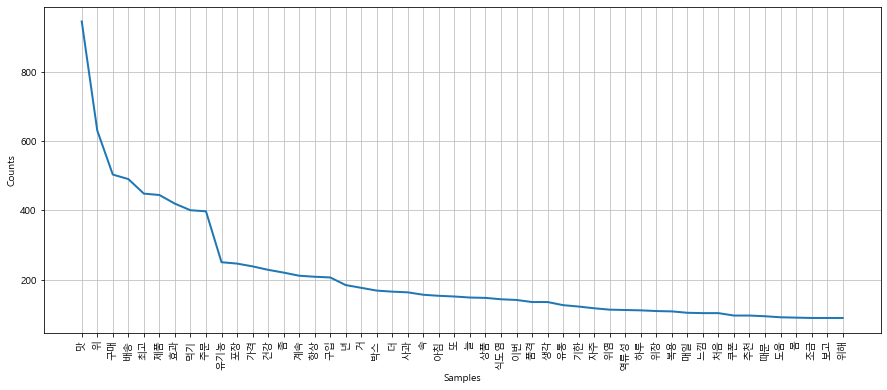

In [13]:
양배추즙리뷰 = nltk.Text(new_tokenss, name='양배추즙리뷰')
plt.figure(figsize=(15,6))
양배추즙리뷰.plot(50)
plt.show()

In [54]:
len(양배추즙리뷰)

26048

In [ ]:
['주문',
 '요',
 '저',
 '계속',
 '깜빡',
 '안',
 '외할머니',
 '달',
 '동안',
 '복용',
 '식도염',
 '걸',
 '고생',
 '즙',
 '호전',
 '가장',
 '번',
 '주문',
 '요',
 '저',
 '계속',
 '깜빡',
 '안',
 '외할머니',
 '달',
...
 '배달',
 '고민',
 '주문',
 '한지',
 '일만'

In [12]:
stop_words = '''요 저 안 달 걸 번 요 저 안 달 것 때 개 리뷰 펼치기 리뷰펼치기 양배추 브로콜리 룡 농원 즙 제주 포 즙 ''' 
stop_list = stop_words.split()
new_token_list = []
for token in new_tokens:
    if token not in stop_list:
        new_token_list.append(token)
new_tokens = new_token_list
new_tokenss = [token for token in new_tokens if token not in stop_list]

In [14]:
data = 양배추즙리뷰.vocab().most_common(300)
data[:50]

[('맛', 945),
 ('위', 630),
 ('구매', 503),
 ('배송', 490),
 ('최고', 448),
 ('제품', 444),
 ('효과', 419),
 ('먹기', 400),
 ('주문', 397),
 ('유기농', 250),
 ('포장', 246),
 ('가격', 238),
 ('건강', 228),
 ('좀', 220),
 ('계속', 211),
 ('항상', 208),
 ('구입', 206),
 ('년', 184),
 ('거', 176),
 ('박스', 168),
 ('더', 165),
 ('사과', 163),
 ('속', 156),
 ('아침', 153),
 ('또', 151),
 ('늘', 148),
 ('상품', 147),
 ('식도염', 143),
 ('이번', 141),
 ('품격', 135),
 ('생각', 135),
 ('유통', 126),
 ('기한', 122),
 ('자주', 117),
 ('위염', 113),
 ('역류성', 112),
 ('하루', 111),
 ('위장', 109),
 ('복용', 108),
 ('매일', 104),
 ('느낌', 103),
 ('처음', 103),
 ('쿠폰', 96),
 ('추천', 96),
 ('때문', 94),
 ('도움', 91),
 ('몸', 90),
 ('조금', 89),
 ('보고', 89),
 ('위해', 89)]

In [16]:
wc = WordCloud(
    width=1920, height=1080,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.1,
    background_color='white'
).generate_from_frequencies(dict(data))

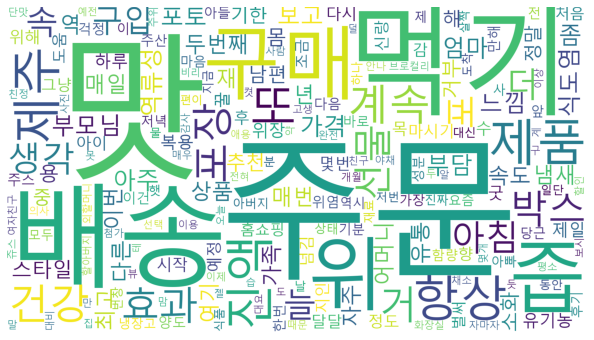

In [37]:
plt.figure(figsize=(12,6))

plt.imshow(wc)
plt.axis('off')
plt.show()

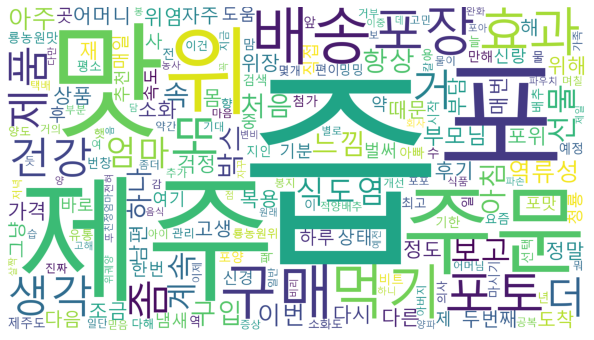

In [56]:
plt.figure(figsize=(12,6))

plt.imshow(wc)
plt.axis('off')
plt.show()

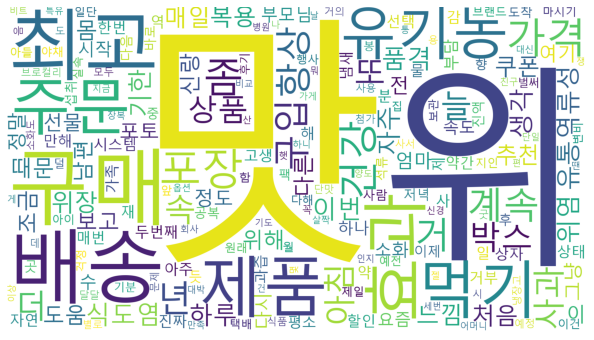

In [17]:
plt.figure(figsize=(12,6))

plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
mask = np.array(Image.open('염경환.jpg'))
image_colors = ImageColorGenerator(mask)

In [ ]:
wc = WordCloud(
    width=1920, height=1080,
    font_path='NanumGothicCoding',
    relative_scaling=0.3,
    mask=mask,
    background_color='white',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wc.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
df['작성년월']

210304    10
210310     9
210507     8
210312     8
210826     8
          ..
200404     1
190706     1
200115     1
210505     1
190925     1
Name: 작성년월일, Length: 892, dtype: int64

In [33]:
df

,평점,내용,작성시간,채널,작성년월일,내용정제,제품명
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스
2,5,hoof****21.02.22.신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 ...,21022223,제주스,210222,신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 ...,제주스
3,5,simb****21.01.03.친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에...,21010322,제주스,210103,친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에 여기저기 검색해보다 홈쇼핑방송...,제주스
4,5,astt****21.05.29.요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습...,2105292223,제주스,210529,요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습니다 배송은 일만에 빨리 왔어요...,제주스
...,...,...,...,...,...,...,...
2175,5,m*u*****21.10.06.장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시...,211006,G마켓,211006,장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시기에 좋아 계속 구매리뷰펼치기,GMM
2176,5,y*u*****22.03.29.좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아...,220329,G마켓,220329,좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아요리뷰펼치기,GMM
2177,5,qhff****21.07.08.우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보...,210708,맑은창,210708,우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보내드렸는데 너무 좋아하시네용 우...,GMM
2178,5,k*l*****21.05.22.좋아요.양배추즙브로콜리진액이 위에 좋다고 해서 자주 ...,210522,G마켓,210522,좋아요양배추즙브로콜리진액이 위에 좋다고 해서 자주 주문해서 먹는제품이예요맛도 좋아요...,GMM


In [34]:
df['작성월']= df.작성년월일.apply(lambda x : str(x)[2:4])

In [35]:
df.head(1)

,평점,내용,작성시간,채널,작성년월일,내용정제,제품명,작성월
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,03


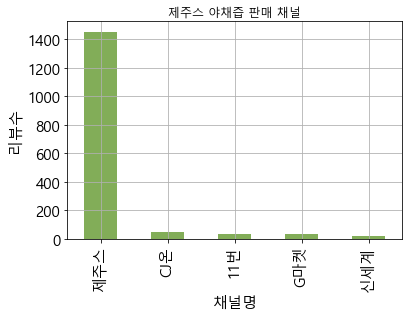

In [126]:
plt.Figure(figsize=(20,12))
df.채널.value_counts()[:5].plot.bar(fontsize=(15),color='#82AD58')
plt.title('제주스 야채즙 판매 채널')
plt.xlabel('채널명',size=(15))
plt.ylabel('리뷰수',size=(15))
plt.grid()
plt.savefig('판매채널.png',dpi=350)

In [68]:

df.groupby([df.작성년,df.작성월]).count()

평점  내용  작성시간  채널  작성년월일  내용정제  작성년월
작성년 작성월                                     
10  04    1   1     1   1      1     1     1
    21    2   2     2   2      2     2     2
    25    1   1     1   1      1     1     1
    73    2   2     2   2      2     2     2
11  02    2   2     2   2      2     2     2
...      ..  ..   ...  ..    ...   ...   ...
95  03    1   1     1   1      1     1     1
    21    1   1     1   1      1     1     1
97  21    1   1     1   1      1     1     1
99  10    1   1     1   1      1     1     1
    32    1   1     1   1      1     1     1

[148 rows x 7 columns]

In [27]:
pwd

'/home/miwoos/WorkSpace/navercafecrawling/홀푸드코리아'

In [28]:
mask_양배추 = np.array(Image.open('/home/miwoos/WorkSpace/GoogleDrive/Data/내일프로젝트(홀푸드코리아)/양배추.jpg'))
image_colors_양배추 = ImageColorGenerator(mask_양배추)

In [29]:
image_colors_양배추

In [30]:
wc_양배추 = WordCloud(
    width=1920, height=1080,
    font_path='NanumGothicCoding.ttf',
    relative_scaling=0.3,
    mask=mask_양배추,
    background_color='black',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc_양배추.to_array()

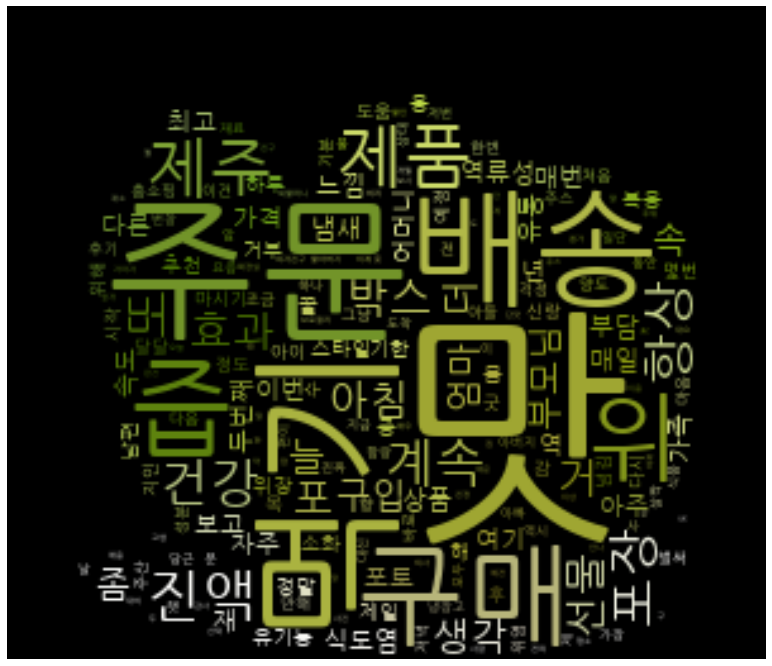

In [31]:
plt.figure(figsize=(20,12))
plt.imshow(wc_양배추.recolor(color_func=image_colors_양배추),interpolation='bilinear')
plt.axis('off')
plt.show()

In [105]:
df.내용정제.cont

,평점,내용,작성시간,채널,작성년월일,내용정제,작성년월,작성년,작성월
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,2003,20,03
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,2103,21,03
2,5,hoof****21.02.22.신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 ...,21022223,제주스,210222,신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 ...,2102,21,02
3,5,simb****21.01.03.친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에...,21010322,제주스,210103,친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에 여기저기 검색해보다 홈쇼핑방송...,2101,21,01
4,5,astt****21.05.29.요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습...,2105292223,제주스,210529,요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습니다 배송은 일만에 빨리 왔어요...,2105,21,05
...,...,...,...,...,...,...,...,...,...
1655,5,hrgh****21.07.28.만족합니다 만족합니다.만족합니다 만족합니다.리뷰펼치기,210728,제주스,210728,만족합니다 만족합니다만족합니다 만족합니다리뷰펼치기,2107,21,07
1656,5,dltk****21.09.16.좋습니다.좋습니다..좋습니다.좋습니다..리뷰펼치기,210916,제주스,210916,좋습니다좋습니다좋습니다좋습니다리뷰펼치기,2109,21,09
1657,4,naki****19.09.25.참 좋아요! 11111참 좋아요! 11111리뷰펼치기,1909251111111111,제주스,190925,참 좋아요 참 좋아요 리뷰펼치기,1909,19,09
1658,4,*e*****21.08.03.gooooodgoooood리뷰펼치기,210803,옥션a,210803,리뷰펼치기,2108,21,08


In [106]:
data = 양배추즙리뷰.vocab().most_common(300)
data[:50]

[('맛', 761),
 ('주문', 405),
 ('먹기', 402),
 ('배송', 381),
 ('구매', 367),
 ('즙', 349),
 ('위', 335),
 ('제품', 253),
 ('제주', 242),
 ('진액', 225),
 ('항상', 182),
 ('또', 163),
 ('계속', 160),
 ('건강', 153),
 ('포장', 151),
 ('효과', 137),
 ('거', 137),
 ('선물', 134),
 ('박스', 125),
 ('아침', 109),
 ('포', 107),
 ('생각', 106),
 ('늘', 101),
 ('더', 101),
 ('속', 86),
 ('구입', 86),
 ('부모님', 85),
 ('좀', 85),
 ('엄마', 81),
 ('식도염', 79),
 ('아주', 74),
 ('가격', 74),
 ('포토', 72),
 ('역류성', 68),
 ('보고', 68),
 ('부담', 68),
 ('느낌', 64),
 ('두번째', 64),
 ('다른', 63),
 ('냄새', 62),
 ('매일', 61),
 ('년', 60),
 ('매번', 60),
 ('상품', 58),
 ('역', 56),
 ('어머니', 56),
 ('속도', 56),
 ('재', 54),
 ('이번', 54),
 ('최고', 54)]

In [120]:
df['키워드'] = df.내용정제.apply(lambda x: '맛' if (x.__contains__('맛') or x.__contains__('먹기')) else
                                            '편의성' if (x.__contains__('배송') or x.__contains__('구매')) else
                                            '재료' if x.__contains__ ('주행') else
                                            '가격' if x.__contains__('보조금') else
                                            '제주' if x.__contains__('제주') else
                                            '기타' 
                                            
                                ) 

In [121]:
df['키워드']

0       기타
1        맛
2        맛
3        맛
4        맛
        ..
1655    기타
1656    기타
1657    기타
1658    기타
1659    기타
Name: 키워드, Length: 1660, dtype: object

In [ ]:
df[df.카페명 =='전기차동호회(투플럭스)'][df['키워드'] != '미분류'].groupby([df.키워드,df.평가]).키워드.count().unstack().plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.grid()
plt.savefig('키워드별긍부정.png',dpi=350)

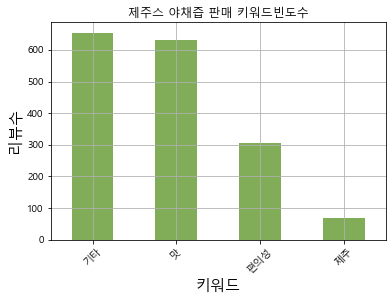

In [130]:
df['키워드'].value_counts().plot.bar(color='#82AD58')
plt.xticks(rotation=45)
plt.grid()
plt.title('제주스 야채즙 판매 키워드빈도수')
plt.xlabel('키워드',size=(15))
plt.ylabel('리뷰수',size=(15))
plt.savefig('키워드.png',dpi=350)

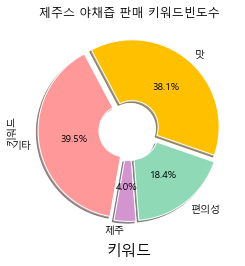

In [142]:
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
df['키워드'].value_counts().plot.pie(autopct='%.1f%%',startangle=260, counterclock=False,shadow=True,explode=explode,colors=colors,wedgeprops=wedgeprops)
plt.xticks(rotation=45)
plt.grid()
plt.title('제주스 야채즙 판매 키워드빈도수')
plt.xlabel('키워드',size=(15))
plt.savefig('키워드pie.png',dpi=350)

In [42]:
df.columns

Index(['Unnamed: 0', '평점', '내용', '작성시간', '채널', '작성년월일', '내용정제'], dtype='object')

In [44]:
df.내용.str.contains('맛있').value_counts()

False    1531
True      129
Name: 내용, dtype: int64

In [55]:
df.내용.str.contains('불편').value_counts()

False    1638
True       22
Name: 내용, dtype: int64

False    1656
True        4
Name: 내용, dtype: int64

In [46]:
df.내용.str.contains('맛이있').value_counts()

False    1657
True        3
Name: 내용, dtype: int64

In [45]:
df.내용.str.contains('맛없').value_counts()

False    1653
True        7
Name: 내용, dtype: int64

In [47]:
df.내용.str.contains('맛이없').value_counts()

False    1659
True        1
Name: 내용, dtype: int64

In [36]:
df

,평점,내용,작성시간,채널,작성년월일,내용정제,제품명,작성월
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,03
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,03
2,5,hoof****21.02.22.신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 ...,21022223,제주스,210222,신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 ...,제주스,02
3,5,simb****21.01.03.친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에...,21010322,제주스,210103,친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에 여기저기 검색해보다 홈쇼핑방송...,제주스,01
4,5,astt****21.05.29.요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습...,2105292223,제주스,210529,요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습니다 배송은 일만에 빨리 왔어요...,제주스,05
...,...,...,...,...,...,...,...,...
2175,5,m*u*****21.10.06.장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시...,211006,G마켓,211006,장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시기에 좋아 계속 구매리뷰펼치기,GMM,10
2176,5,y*u*****22.03.29.좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아...,220329,G마켓,220329,좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아요리뷰펼치기,GMM,03
2177,5,qhff****21.07.08.우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보...,210708,맑은창,210708,우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보내드렸는데 너무 좋아하시네용 우...,GMM,07
2178,5,k*l*****21.05.22.좋아요.양배추즙브로콜리진액이 위에 좋다고 해서 자주 ...,210522,G마켓,210522,좋아요양배추즙브로콜리진액이 위에 좋다고 해서 자주 주문해서 먹는제품이예요맛도 좋아요...,GMM,05


In [37]:
df['키워드'] = df.내용.apply(lambda x: '맛' if (x.__contains__('맛') or x.__contains__('먹기')) else
                                            '편의성' if (x.__contains__('배송') or x.__contains__('구매')) else
                                            '재료' if x.__contains__ ('주행') else
                                            '가격' if x.__contains__('보조금') else
                                            '제주' if x.__contains__('제주') else
                                            '건강' if (x.__contains__('건강') or  x.__contains__('위') or x.__contains__('효과') or x.__contains__('식도염'))
                                            else '미분류'
                                ) 

In [38]:
df

,평점,내용,작성시간,채널,작성년월일,내용정제,제품명,작성월,키워드
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,03,건강
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,03,맛
2,5,hoof****21.02.22.신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 ...,21022223,제주스,210222,신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 ...,제주스,02,맛
3,5,simb****21.01.03.친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에...,21010322,제주스,210103,친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에 여기저기 검색해보다 홈쇼핑방송...,제주스,01,맛
4,5,astt****21.05.29.요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습...,2105292223,제주스,210529,요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습니다 배송은 일만에 빨리 왔어요...,제주스,05,맛
...,...,...,...,...,...,...,...,...,...
2175,5,m*u*****21.10.06.장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시...,211006,G마켓,211006,장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시기에 좋아 계속 구매리뷰펼치기,GMM,10,편의성
2176,5,y*u*****22.03.29.좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아...,220329,G마켓,220329,좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아요리뷰펼치기,GMM,03,맛
2177,5,qhff****21.07.08.우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보...,210708,맑은창,210708,우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보내드렸는데 너무 좋아하시네용 우...,GMM,07,미분류
2178,5,k*l*****21.05.22.좋아요.양배추즙브로콜리진액이 위에 좋다고 해서 자주 ...,210522,G마켓,210522,좋아요양배추즙브로콜리진액이 위에 좋다고 해서 자주 주문해서 먹는제품이예요맛도 좋아요...,GMM,05,맛


In [234]:
print(str(맛_list))

['맛도', ' 맛', ' 목넘김', ' 제일 맛. ', ' 마시기편함', ' 비리지 않음', ' 맛 과 향 ', ' (100%사려다 맛중요 하루도 빠짐없이)', ' 아이도 즐겨', ' 당근(달달)', ' 거부감 없', ' 부드러움', '  식품 & 약', ' 진하지않아 좋다', ' 향이세지않음', ' 달콤-양적당. ', ' 먹어본중 ', ' 제일 맛잇다. ', ' 먹을만함.', ' 맛좋음.', ' 비위약한(남편)', ' 복용가능. ', '주스처럼 ', '자주마심', ' 섞여있어 덜부담 ', ' 먹기힘들줄알았는데 단맛 ', ' 매일먹음', ' 연하다', ' 가볍다 ', ' 먹이편한', ' 부드러운맛 ', ' 맛있어서 ', ' 하루2-3포  ', ' 주스처럼 ', '목넘김', ' 냄새없이']


In [244]:
df['맛이있다없다'] = df.내용.apply(lambda x: '맛이있다' if (x.__contains__('맛있') or 
                                                            x.__contains__('맛도좋다') or 
                                                            x.__contains__('먹을만함') or
                                                            x.__contains__('맛좋음') or
                                                            x.__contains__('부드러운맛') or
                                                            x.__contains__('맛있어서') or
                                                            x.__contains__('단맛'))
                                                            else '맛이없다' if ( x.__contains__('맛없') or
                                                            x.__contains__('없다') or 
                                                            x.__contains__('비위상함') or 
                                                            x.__contains__('노맛') or
                                                            x.__contains__('역하다') or
                                                            x.__contains__('참고') or
                                                            x.__contains__('부담스럽') or
                                                            x.__contains__('비리다') or
                                                            x.__contains__('맛이없다') or
                                                            x.__contains__('맛없음'))
                                                else '미분류' ) 

In [245]:
df['맛이있다없다'].value_counts()

미분류     5528
맛이있다     354
맛이없다     138
Name: 맛이있다없다, dtype: int64

In [40]:
df

,평점,내용,작성시간,채널,작성년월일,내용정제,제품명,작성월,키워드,맛이있다없다
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,03,건강,미분류
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,03,맛,맛이있다
2,5,hoof****21.02.22.신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 ...,21022223,제주스,210222,신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 ...,제주스,02,맛,미분류
3,5,simb****21.01.03.친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에...,21010322,제주스,210103,친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에 여기저기 검색해보다 홈쇼핑방송...,제주스,01,맛,미분류
4,5,astt****21.05.29.요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습...,2105292223,제주스,210529,요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습니다 배송은 일만에 빨리 왔어요...,제주스,05,맛,미분류
...,...,...,...,...,...,...,...,...,...,...
2175,5,m*u*****21.10.06.장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시...,211006,G마켓,211006,장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시기에 좋아 계속 구매리뷰펼치기,GMM,10,편의성,미분류
2176,5,y*u*****22.03.29.좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아...,220329,G마켓,220329,좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아요리뷰펼치기,GMM,03,맛,맛이없다
2177,5,qhff****21.07.08.우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보...,210708,맑은창,210708,우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보내드렸는데 너무 좋아하시네용 우...,GMM,07,미분류,미분류
2178,5,k*l*****21.05.22.좋아요.양배추즙브로콜리진액이 위에 좋다고 해서 자주 ...,210522,G마켓,210522,좋아요양배추즙브로콜리진액이 위에 좋다고 해서 자주 주문해서 먹는제품이예요맛도 좋아요...,GMM,05,맛,미분류


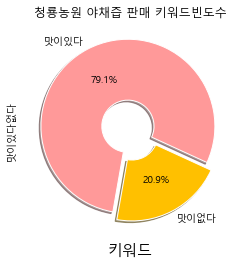

In [60]:

explode = [0.05, 0.05]
colors = ['#ff9999', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
df['맛이있다없다'][df['맛이있다없다']!='미분류'].value_counts().plot.pie(autopct='%.1f%%',startangle=260, counterclock=False,shadow=True,explode=explode,colors=colors,wedgeprops=wedgeprops)
plt.xticks(rotation=45)
plt.grid()
plt.title('청룡농원 야채즙 판매 키워드빈도수')
plt.xlabel('키워드',size=(15))
plt.savefig('청룡농원맛이있다없다.png',dpi=350)

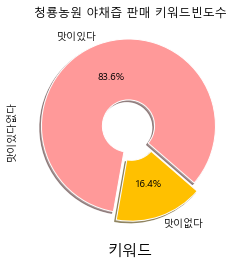

In [20]:

explode = [0.05, 0.05]
colors = ['#ff9999', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
df['맛이있다없다'][df['맛이있다없다']!='미분류'].value_counts().plot.pie(autopct='%.1f%%',startangle=260, counterclock=False,shadow=True,explode=explode,colors=colors,wedgeprops=wedgeprops)
plt.xticks(rotation=45)
plt.grid()
plt.title('GMM 야채즙 판매 맛')
plt.xlabel('키워드',size=(15))
plt.savefig('GMM맛이있다없다.png',dpi=350)

In [67]:
cd ~/WorkSpace/GoogleDrive/Data/

/home/miwoos/WorkSpace/GoogleDrive/Data


In [65]:
pwd

'/home/miwoos/WorkSpace/navercafecrawling/홀푸드코리아'

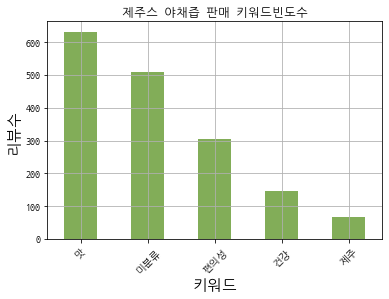

In [70]:
df['키워드'].value_counts().plot.bar(color='#82AD58')
plt.xticks(rotation=45)
plt.grid()
plt.title('제주스 야채즙 판매 키워드빈도수')
plt.xlabel('키워드',size=(15))
plt.ylabel('리뷰수',size=(15))
plt.savefig('키워드.png',dpi=350)

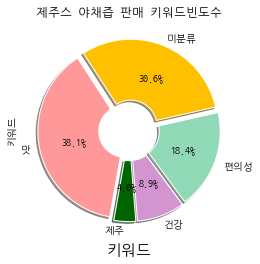

In [71]:
explode = [0.05, 0.05, 0.05, 0.05,0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','#006400']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
df['키워드'].value_counts().plot.pie(autopct='%.1f%%',startangle=260, counterclock=False,shadow=True,explode=explode,colors=colors,wedgeprops=wedgeprops)
plt.xticks(rotation=45)
plt.grid()
plt.title('제주스 야채즙 판매 키워드빈도수')
plt.xlabel('키워드',size=(15))
plt.savefig('키워드pie.png',dpi=350)

In [246]:
df['선물관련키워드'] = df.내용.apply(lambda x: '부모님' if (x.__contains__('어머니') or x.__contains__('엄마')or x.__contains__('아빠') or x.__contains__('아버지') or x.__contains__ ('부모')) else
                                            '자녀' if (x.__contains__('애들') or  x.__contains__('아들') or x.__contains__('딸') or x.__contains__('애기')  or x.__contains__('애들')  or x.__contains__('자식'))else
                                            '조부모' if (x.__contains__('할머니') or x.__contains__('할아버지') or x.__contains__('조부모') or x.__contains__('시어머니') or x.__contains__('장인') or x.__contains__('장모')) else 
                                            '친구애인' if (x.__contains__('남자친구') or x.__contains__('여자친구') or x.__contains__('남친') or x.__contains__('여친') or x.__contains__('친구')) else 
                                            '미분류'
                                ) 

In [248]:
df[df.회사명 == '제주스']['선물관련키워드'].value_counts()

미분류     1480
부모님      139
자녀        22
친구애인      13
조부모        6
Name: 선물관련키워드, dtype: int64

In [251]:
df.columns

Index(['평점', '내용', '작성시간', '채널', '작성년월일', '내용정제', '회사명', '맛이있다없다', '선물관련키워드'], dtype='object')

In [253]:
df['맛이있다없다'].value_counts()

미분류     5528
맛이있다     354
맛이없다     138
Name: 맛이있다없다, dtype: int64

In [247]:
df['선물관련키워드'].value_counts()

미분류     5295
부모님      558
자녀       104
친구애인      47
조부모       16
Name: 선물관련키워드, dtype: int64

In [58]:
df[df.제품명 == 'GMM']['선물관련키워드'].value_counts()

미분류    1973
부모님     150
자녀       54
조부모       3
Name: 선물관련키워드, dtype: int64

In [57]:
df[df.제품명 == '청룡농원']['선물관련키워드'].value_counts()

미분류    1881
부모님     269
자녀       28
조부모       2
Name: 선물관련키워드, dtype: int64

In [56]:
df[df.제품명 == '제주스']['선물관련키워드'].value_counts()

미분류    880
부모님    320
조부모    240
자녀     160
Name: 선물관련키워드, dtype: int64

In [60]:
df.head(2)

,평점,내용,작성시간,채널,작성년월일,내용정제,제품명,작성월,키워드,맛이있다없다,선물관련키워드
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,03,건강,미분류,조부모
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,03,맛,맛이있다,미분류


In [61]:
df.to_csv('야채즙리뷰데이터합_3사.csv',index=False)

In [41]:
df.h

,평점,내용,작성시간,채널,작성년월일,내용정제,제품명,작성월,키워드,맛이있다없다
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,03,건강,미분류
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,03,맛,맛이있다
2,5,hoof****21.02.22.신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 ...,21022223,제주스,210222,신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 ...,제주스,02,맛,미분류
3,5,simb****21.01.03.친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에...,21010322,제주스,210103,친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에 여기저기 검색해보다 홈쇼핑방송...,제주스,01,맛,미분류
4,5,astt****21.05.29.요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습...,2105292223,제주스,210529,요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습니다 배송은 일만에 빨리 왔어요...,제주스,05,맛,미분류
...,...,...,...,...,...,...,...,...,...,...
2175,5,m*u*****21.10.06.장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시...,211006,G마켓,211006,장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시기에 좋아 계속 구매리뷰펼치기,GMM,10,편의성,미분류
2176,5,y*u*****22.03.29.좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아...,220329,G마켓,220329,좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아요리뷰펼치기,GMM,03,맛,맛이없다
2177,5,qhff****21.07.08.우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보...,210708,맑은창,210708,우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보내드렸는데 너무 좋아하시네용 우...,GMM,07,미분류,미분류
2178,5,k*l*****21.05.22.좋아요.양배추즙브로콜리진액이 위에 좋다고 해서 자주 ...,210522,G마켓,210522,좋아요양배추즙브로콜리진액이 위에 좋다고 해서 자주 주문해서 먹는제품이예요맛도 좋아요...,GMM,05,맛,미분류


In [45]:
df

,평점,내용,작성시간,채널,작성년월일,내용정제,제품명,작성월,키워드,맛이있다없다
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,03,건강,미분류
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,03,맛,맛이있다
2,5,hoof****21.02.22.신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 ...,21022223,제주스,210222,신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 ...,제주스,02,맛,미분류
3,5,simb****21.01.03.친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에...,21010322,제주스,210103,친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에 여기저기 검색해보다 홈쇼핑방송...,제주스,01,맛,미분류
4,5,astt****21.05.29.요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습...,2105292223,제주스,210529,요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습니다 배송은 일만에 빨리 왔어요...,제주스,05,맛,미분류
...,...,...,...,...,...,...,...,...,...,...
2175,5,m*u*****21.10.06.장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시...,211006,G마켓,211006,장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시기에 좋아 계속 구매리뷰펼치기,GMM,10,편의성,미분류
2176,5,y*u*****22.03.29.좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아...,220329,G마켓,220329,좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아요리뷰펼치기,GMM,03,맛,맛이없다
2177,5,qhff****21.07.08.우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보...,210708,맑은창,210708,우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보내드렸는데 너무 좋아하시네용 우...,GMM,07,미분류,미분류
2178,5,k*l*****21.05.22.좋아요.양배추즙브로콜리진액이 위에 좋다고 해서 자주 ...,210522,G마켓,210522,좋아요양배추즙브로콜리진액이 위에 좋다고 해서 자주 주문해서 먹는제품이예요맛도 좋아요...,GMM,05,맛,미분류


In [47]:
df.head(2)

,평점,내용,작성시간,채널,작성년월일,내용정제,제품명,작성월,키워드,맛이있다없다
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,03,건강,미분류
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,03,맛,맛이있다


In [44]:
df.to_csv('야채즙데이터합친거.csv',index=False)

In [64]:
df.head(2)

,평점,내용,작성시간,채널,작성년월일,내용정제,제품명,작성월,키워드,맛이있다없다,선물관련키워드
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,03,건강,미분류,조부모
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,03,맛,맛이있다,미분류


In [69]:
df.제품명.value_counts()

청룡농원    2180
GMM     2180
제주스     1600
Name: 제품명, dtype: int64

In [78]:
df[df.제품명 =='청룡농원'].head(2)

,평점,내용,작성시간,채널,작성년월일,내용정제,제품명,작성월,키워드,맛이있다없다,선물관련키워드
0,5,룡농원wodn****21.04.08.제주 빨간양배추즙 75포: 제주 빨간양배추즙 7...,2104087575150333,제주청,210408,룡농원제주 빨간양배추즙 포 제주 빨간양배추즙 포베스트 후기 한번 되보려고 글 작성해...,청룡농원,04,맛,미분류,부모님
1,5,룡농원naya****20.09.09.제주 빨간양배추즙 75포: 제주 비트즙 75포위...,2009097575342,제주청,200909,룡농원제주 빨간양배추즙 포 제주 비트즙 포위가다시안좋아졌는지 속이울렁울렁 배도자꾸아...,청룡농원,09,맛,미분류,자녀


In [79]:
df[df.제품명 =='GMM'].head(2)

,평점,내용,작성시간,채널,작성년월일,내용정제,제품명,작성월,키워드,맛이있다없다,선물관련키워드
0,5,가ch******20.10.29.최고예요유통기한:2022년 7월14일까지~양배추즙을...,20102920227142,11번,201029,가최고예요유통기한년 월일까지양배추즙을 년 넘게 먹고 있는데 위건강에 효과를 보고있어...,GMM,10,맛,미분류,미분류
1,4,가sk******20.03.08.좋아요산수유 재 구입!! 유기농이라 믿고계속 구입중...,20030832311,11번,200308,가좋아요산수유 재 구입 유기농이라 믿고계속 구입중 이번엔 신랑만 주려고 조금 구입했...,GMM,03,맛,미분류,미분류


In [80]:
df[df.제품명 =='제주스'].head(2)

,평점,내용,작성시간,채널,작성년월일,내용정제,제품명,작성월,키워드,맛이있다없다,선물관련키워드
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,03,건강,미분류,조부모
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,03,맛,맛이있다,미분류


In [74]:
df.isnull().sum()

평점         0
내용         0
작성시간       0
채널         0
작성년월일      0
내용정제       0
제품명        0
작성월        0
키워드        0
맛이있다없다     0
선물관련키워드    0
dtype: int64

In [84]:
df.맛이있다없다.value_counts()

미분류     5340
맛이있다     500
맛이없다     120
Name: 맛이있다없다, dtype: int64

<AxesSubplot:xlabel='제품명'>

<Figure size 864x432 with 0 Axes>

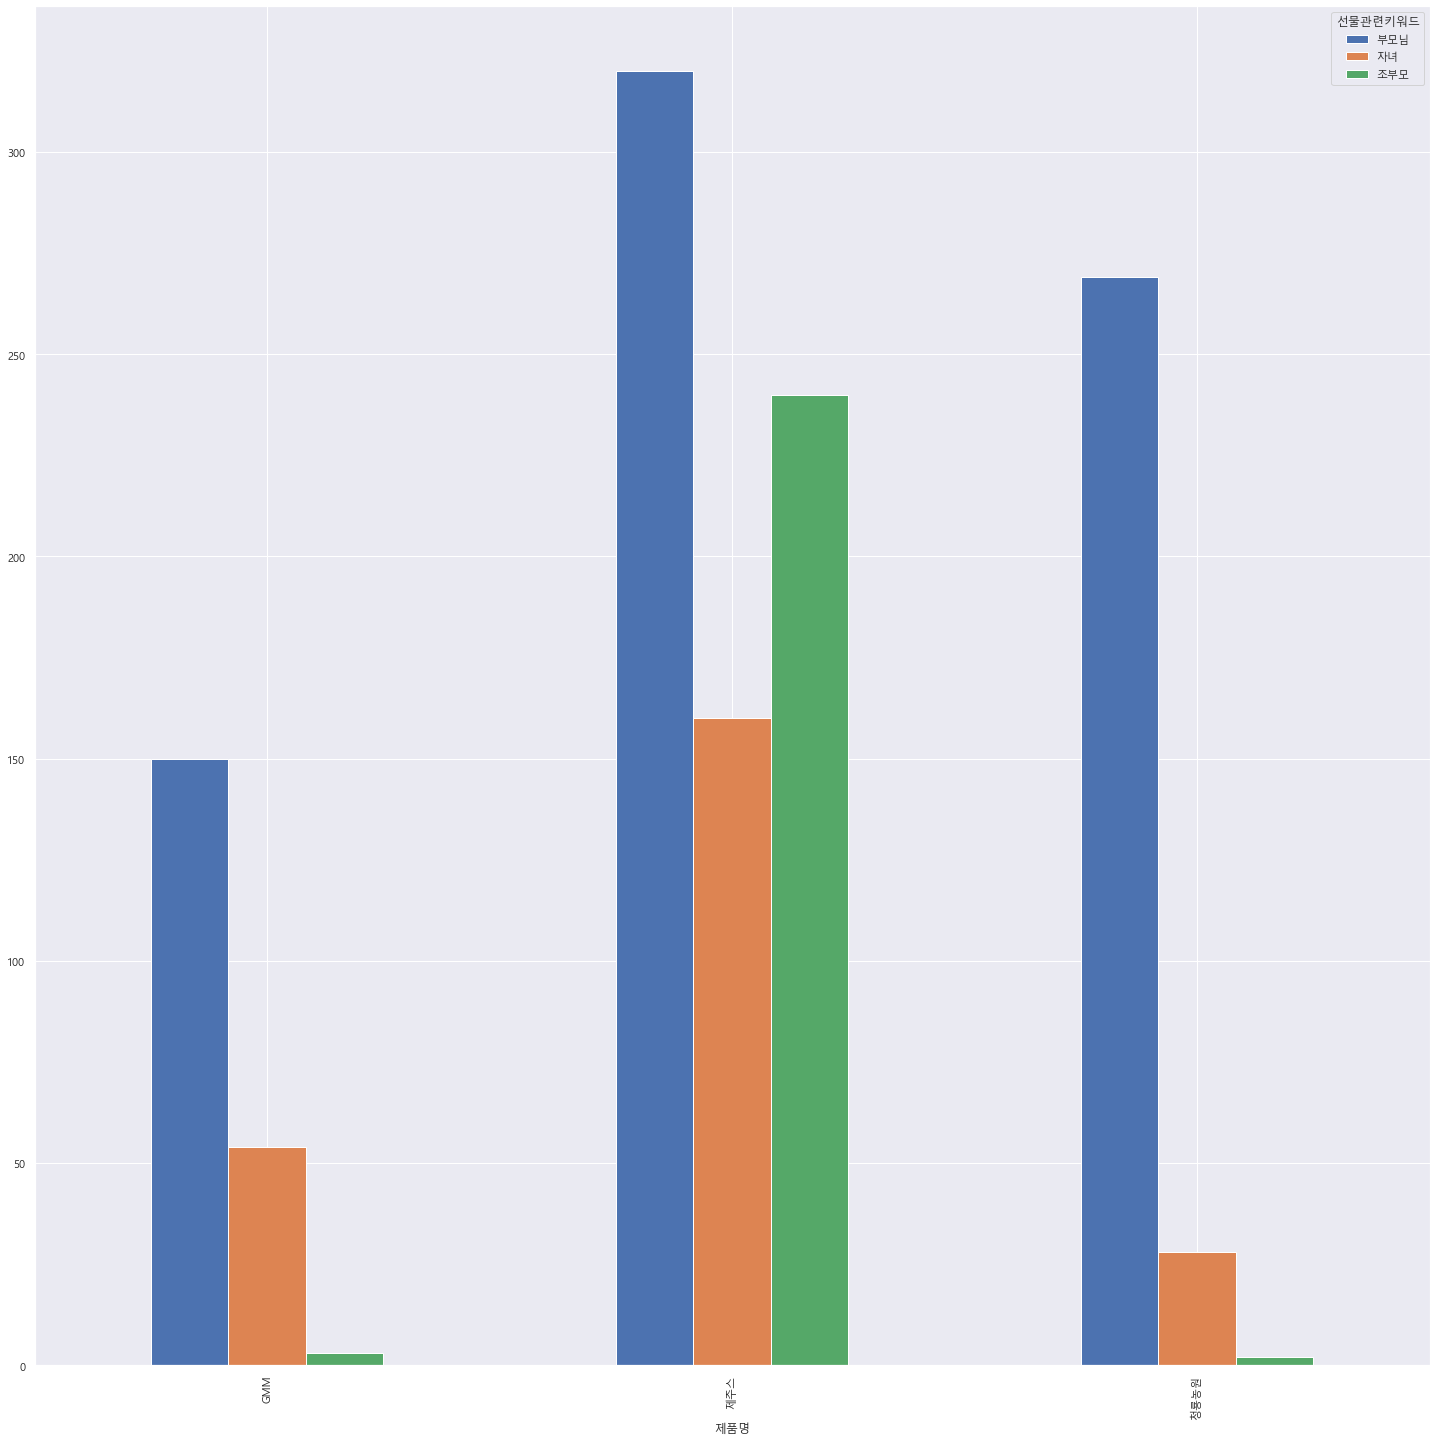

In [102]:
plt.figure(figsize=(12,6))
df[df.선물관련키워드 !='미분류'].groupby(['제품명',
           '선물관련키워드']).내용.count().unstack().plot.bar()

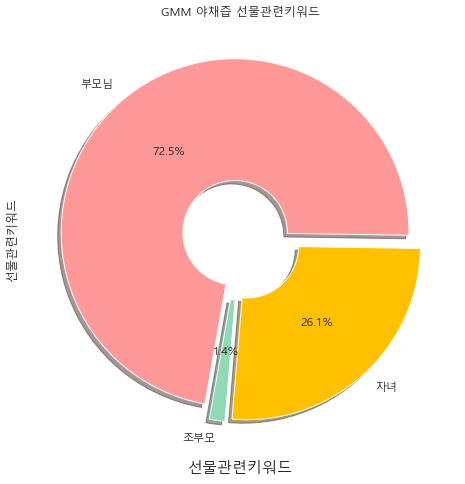

In [159]:
explode = [0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
df[df.제품명 == 'GMM']['선물관련키워드'].value_counts()[1:].plot.pie(autopct='%.1f%%',startangle=260, counterclock=False,shadow=True,explode=explode,colors=colors,wedgeprops=wedgeprops)
plt.xticks(rotation=45)
plt.grid()
plt.title('GMM 야채즙 선물관련키워드')
plt.xlabel('선물관련키워드',size=(15))
plt.savefig('GMM선물관련키워드.png',dpi=350)

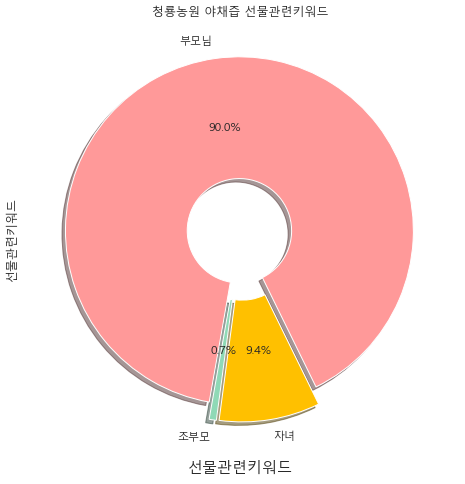

In [158]:
explode = [0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
df[df.제품명 == '청룡농원']['선물관련키워드'].value_counts()[1:].plot.pie(autopct='%.1f%%',startangle=260, counterclock=False,shadow=True,explode=explode,colors=colors,wedgeprops=wedgeprops)
plt.xticks(rotation=45)
plt.grid()
plt.title('청룡농원 야채즙 선물관련키워드')
plt.xlabel('선물관련키워드',size=(15))
plt.savefig('청룡농원선물관련키워드.png',dpi=350)

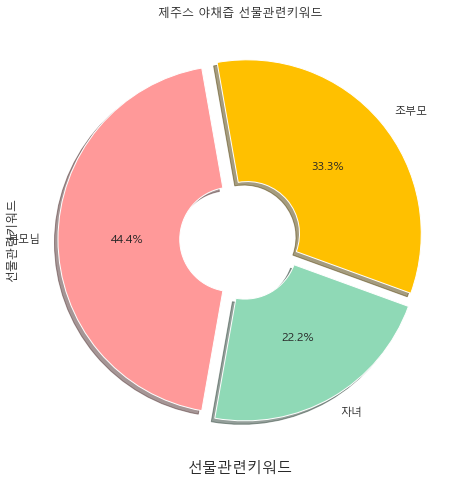

In [157]:
explode = [0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
df[df.제품명 == '제주스']['선물관련키워드'].value_counts()[1:].plot.pie(autopct='%.1f%%',startangle=260, counterclock=False,shadow=True,explode=explode,colors=colors,wedgeprops=wedgeprops)
plt.xticks()
plt.grid()
plt.title('제주스 야채즙 선물관련키워드')
plt.xlabel('선물관련키워드',size=(15))
plt.savefig('제주스선물관련키워드.png',dpi=350)

In [257]:
df.선물관련키워드.value_counts()

미분류     5295
부모님      558
자녀       104
친구애인      47
조부모       16
Name: 선물관련키워드, dtype: int64

Text(0.5, 0, '선물관련키워드')

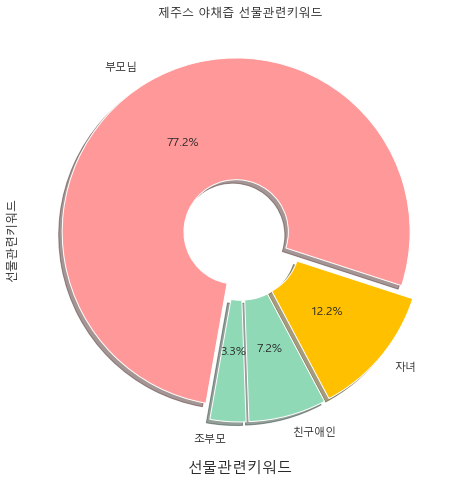

In [258]:
explode = [0.05, 0.05, 0.05,0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6','#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
df[df.회사명 == '제주스']['선물관련키워드'].value_counts()[1:].plot.pie(autopct='%.1f%%',startangle=260, counterclock=False,shadow=True,explode=explode,colors=colors,wedgeprops=wedgeprops)
plt.grid()
plt.title('제주스 야채즙 선물관련키워드')
plt.xlabel('선물관련키워드',size=(15))
# plt.savefig('제주스선물관련키워드.png',dpi=350)

In [259]:
df['']

AttributeError: 'DataFrame' object has no attribute '제주스'

In [109]:
df[df.제품명 == 'GMM']['선물관련키워드'].value_counts()[1:]

부모님    150
자녀      54
조부모      3
Name: 선물관련키워드, dtype: int64

In [ ]:
df[df.제품명 =='GMM'].head(2)

In [ ]:
df[df.제품명 =='GMM'].head(2)

In [153]:
sns.set(rc = {'figure.figsize':(12,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'
# sns.displot(data=df, x="키워드",col='키워드',hue='제품명')

In [117]:
df.내용

0       heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...
1       adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...
2       hoof****21.02.22.신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 ...
3       simb****21.01.03.친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에...
4       astt****21.05.29.요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습...
                              ...                        
2175    m*u*****21.10.06.장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시...
2176    y*u*****22.03.29.좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아...
2177    qhff****21.07.08.우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보...
2178    k*l*****21.05.22.좋아요.양배추즙브로콜리진액이 위에 좋다고 해서 자주 ...
2179    가po******21.04.14.최고예요매번 먹는 제품이에여할인쿠폰으로 착한 가격으...
Name: 내용, Length: 5960, dtype: object

In [141]:
df[df.제품명 =='GMM'].내용.str.contains('변비').value_counts()

False    2159
True       21
Name: 내용, dtype: int64

In [142]:
df[df.제품명 =='청룡농원'].내용.str.contains('변비').value_counts()

False    2168
True       12
Name: 내용, dtype: int64

In [143]:
df[df.제품명 =='제주스'].내용.str.contains('변비').value_counts()

False    1600
Name: 내용, dtype: int64

In [146]:
df[df.제품명 =='청룡농원'].내용[1]

'룡농원naya****20.09.09.제주 빨간양배추즙 75포: 제주 비트즙 75포위가다시안좋아졌는지 속이울렁울렁 배도자꾸아프고 첨처럼 자다일어날정도로 아픈게아니라 먹는걸로 일단해결해보고자 검색결과 양배추가좋다고해서 먹어보기로결정!!!어디서구매를해야할지몰라서 한위가다시안좋아졌는지 속이울렁울렁 배도자꾸아프고 첨처럼 자다일어날정도로 아픈게아니라 먹는걸로 일단해결해보고자 검색결과 양배추가좋다고해서 먹어보기로결정!!!어디서구매를해야할지몰라서 한참인터넷을 뒤적뒤적... 여기저기서 양배추즙이 냄새도 맛도 먹기힘들정도라고 많은글이있어서 엄청고민했는데 여기선 먹는데 거부감없다고하여 이것저것 살펴본후 주문!가격부담은좀있었네요ㅠㅜ..그리고받고난후 그날부터 바로 먹기시작  했어요. 거짓말안하고 진짜이틀째부터 울렁거림이 잦아들었구요  3ㅡ4일되는날은 전혀아무렇지가 않아요. 완젼신기방기! 진작알았음 처음 위가많이 안좋다고할때 바로먹었을텐데 이제서야알았네요ㅠㅜ.비트가통풍에좋다고해서 신랑꺼도같이 시켰는데 터진게2개가  있어서 문의했더니 바로 넉넉하게 여유분도 보내주시고 너무맘에드네요. 감사합니다.요고다먹고나면 또주문하겠습니다.리뷰펼치기'

In [147]:
df

,평점,내용,작성시간,채널,작성년월일,내용정제,제품명,작성월,키워드,맛이있다없다,선물관련키워드
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,03,건강,미분류,조부모
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,03,맛,맛이있다,미분류
2,5,hoof****21.02.22.신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 ...,21022223,제주스,210222,신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 ...,제주스,02,맛,미분류,미분류
3,5,simb****21.01.03.친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에...,21010322,제주스,210103,친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에 여기저기 검색해보다 홈쇼핑방송...,제주스,01,맛,미분류,미분류
4,5,astt****21.05.29.요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습...,2105292223,제주스,210529,요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습니다 배송은 일만에 빨리 왔어요...,제주스,05,맛,미분류,부모님
...,...,...,...,...,...,...,...,...,...,...,...
2175,5,m*u*****21.10.06.장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시...,211006,G마켓,211006,장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시기에 좋아 계속 구매리뷰펼치기,GMM,10,편의성,미분류,미분류
2176,5,y*u*****22.03.29.좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아...,220329,G마켓,220329,좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아요리뷰펼치기,GMM,03,맛,맛이없다,미분류
2177,5,qhff****21.07.08.우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보...,210708,맑은창,210708,우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보내드렸는데 너무 좋아하시네용 우...,GMM,07,미분류,미분류,미분류
2178,5,k*l*****21.05.22.좋아요.양배추즙브로콜리진액이 위에 좋다고 해서 자주 ...,210522,G마켓,210522,좋아요양배추즙브로콜리진액이 위에 좋다고 해서 자주 주문해서 먹는제품이예요맛도 좋아요...,GMM,05,맛,미분류,미분류


In [162]:
맛_list = '맛도, 맛, 목넘김, 제일 맛. , 마시기편함, 비리지 않음, 맛 과 향 , (100%사려다 맛중요 하루도 빠짐없이), 아이도 즐겨, 당근(달달), 거부감 없, 부드러움,  식품 & 약, 진하지않아 좋다, 향이세지않음, 달콤-양적당. , 먹어본중 , 제일 맛잇다. , 먹을만함., 맛좋음., 비위약한(남편), 복용가능. ,주스처럼 ,자주마심, 섞여있어 덜부담 , 먹기힘들줄알았는데 단맛 , 매일먹음, 연하다, 가볍다 , 먹이편한, 부드러운맛 , 맛있어서 , 하루2-3포  , 주스처럼 ,목넘김, 냄새없이'.split(',')
선물_list = '부모님, 어머니가 주문 부탁 (매우 만족) 엄마가더좋아함 시어머니 아들(소화장애-계속사달라한다), 엄마 선물, 온가족, 남자친구, 선물 (먹기좋도 맛좋다), 신랑, 같이, 아버지. 동생,'.split(',')
건강_list = '아침,속쓰림개선,역류식도,속편함,위건강,아침저녁으로,(없으면 불안),속아픔,만성위염, 소화불량, 생명수, 일상적, 복부팽만, 복통, 소화,변비, 피부트러블'.split(',')
재구매_list = '5개월, 2년 , 가정의달 할인, 정기적, 매번여기서, 5박스째, 재주문,소개, 계속주문, 지인추천으로, 매번주문. 몇개월째. 일년째, 1년넘게 , 먹고좋아 , 주변추천. , 꾸준히 , 3번째, 없으면 안되는 제품, 홈쇼핑구매후 재구매, 떨어지지않게, 재구매 , 꾸준한'.split(',')

In [164]:
df.head(2)

,평점,내용,작성시간,채널,작성년월일,내용정제,제품명,작성월,키워드,맛이있다없다,선물관련키워드
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,03,건강,미분류,조부모
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,03,맛,맛이있다,미분류


In [ ]:
df['선물관련키워드'] = df.내용.apply(lambda x: '부모님' if (x.__contains__('어머니') or x.__contains__('엄마')or x.__contains__('아빠') or x.__contains__('아버지') or x.__contains__ ('부모')) else
                                            '자녀' if (x.__contains__('애들') or  x.__contains__('아들') or x.__contains__('딸') or x.__contains__('애기')  or x.__contains__('애들'))else
                                            '조부모' if (x.__contains__('할머니') or x.__contains__('할아버지') or x.__contains__('조부모') )
                                            else '미분류'
                                ) 

In [180]:
df['지혜스키워드'] = df.내용.apply(lambda x : '맛' if( x.split(' ') in 맛_list) 
                                    else '선물' if( x.split(' ') in 선물_list) 
                                    else '건강' if( x.split(' ') in 건강_list)
                                    else '재구매' if( x.split(' ') in 재구매_list)
                                    else x
                                    )

In [183]:
from tqdm import tqdm

In [190]:
group = [맛_list,선물_list,건강_list,재구매_list]
df['지혜스키워드']
for 리스트 in group:
    for 아이템 in tqdm(리스트):
        if 리스트 == 맛_list:
            df['지혜스키워드'] = df.내용.apply(lambda x : '맛' if (x.__contains__(아이템)) else x)
        if 리스트 == 선물_list:
            df['지혜스키워드'] = df.내용.apply(lambda x : '선물' if (x.__contains__(아이템)) else x)
            
        if 리스트 == 건강_list:
            df['지혜스키워드'] = df.내용.apply(lambda x : '건강' if (x.__contains__(아이템)) else x)
            
        if 리스트 == 재구매_list:
            df['지혜스키워드'] = df.내용.apply(lambda x : '재구매' if (x.__contains__(아이템)) else x)

100%|██████████| 21/21 [00:00<00:00, 319.25it/s]


In [267]:
len(df.내용)

6020

In [269]:
df.회사명.value_counts()

청룡농원    2180
GMM     2180
제주스     1660
Name: 회사명, dtype: int64

In [274]:
df['내용'][0]

'heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만.. 외할머니는 3달 동안 꾸준히 복용하고 계셔요! 식도염이나 그런 걸로 많이 고생하셨는데 즙 꾸준히 마시면서 호전된게 가장 큰3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만.. 외할머니는 3달 동안 꾸준히 복용하고 계셔요! 식도염이나 그런 걸로 많이 고생하셨는데 즙 꾸준히 마시면서 호전된게 가장 큰 요인인 것 같아요..! 혹시 주문할까 말까 고민하는 분들이 계시다면 한 번 주문해보는게 좋다고 생각합니다!요즘 바이러스가 기승이라 배달이 될까 고민했는데 주문한지 1~2일만에 빨리 도착해서 좋았어요 :) 항상 몸 조심하시고 마스크 꼭꼭 착용하고 다니세요! 좋은 건강식품 생산해주셔서 감사합니다! 사시는 동안 많이 버시고 적게 일하세요 !리뷰펼치기'

In [272]:
df.reset_index(inplace=True,drop=True)

In [273]:
df

,평점,내용,작성시간,채널,작성년월일,내용정제,회사명,맛이있다없다,선물관련키워드
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,미분류,조부모
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,맛이있다,미분류
2,5,hoof****21.02.22.신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 ...,21022223,제주스,210222,신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 ...,제주스,맛이없다,미분류
3,5,simb****21.01.03.친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에...,21010322,제주스,210103,친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에 여기저기 검색해보다 홈쇼핑방송...,제주스,맛이없다,미분류
4,5,astt****21.05.29.요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습...,2105292223,제주스,210529,요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습니다 배송은 일만에 빨리 왔어요...,제주스,미분류,부모님
...,...,...,...,...,...,...,...,...,...
6015,5,m*u*****21.10.06.장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시...,211006,G마켓,211006,장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시기에 좋아 계속 구매리뷰펼치기,GMM,미분류,미분류
6016,5,y*u*****22.03.29.좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아...,220329,G마켓,220329,좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아요리뷰펼치기,GMM,맛이없다,미분류
6017,5,qhff****21.07.08.우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보...,210708,맑은창,210708,우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보내드렸는데 너무 좋아하시네용 우...,GMM,미분류,조부모
6018,5,k*l*****21.05.22.좋아요.양배추즙브로콜리진액이 위에 좋다고 해서 자주 ...,210522,G마켓,210522,좋아요양배추즙브로콜리진액이 위에 좋다고 해서 자주 주문해서 먹는제품이예요맛도 좋아요...,GMM,미분류,미분류


In [281]:
df.키워드분류스.value_counts()

건강    6020
Name: 키워드분류스, dtype: int64

In [282]:
df

,평점,내용,작성시간,채널,작성년월일,내용정제,회사명,맛이있다없다,선물관련키워드,키워드분류스
0,5,heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만...,200314333312,제주스,200314,번째 주문이네요 저는 계속 깜빡해서 잘 안 먹지만 외할머니는 달 동안 꾸준히 복용하...,제주스,미분류,조부모,건강
1,5,adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...,2103099952860100,제주스,210309,안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱...,제주스,맛이있다,미분류,건강
2,5,hoof****21.02.22.신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 ...,21022223,제주스,210222,신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 ...,제주스,맛이없다,미분류,건강
3,5,simb****21.01.03.친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에...,21010322,제주스,210103,친정 어머님이 위염진단을 받으셔서 양배추즙이 좋다기에 여기저기 검색해보다 홈쇼핑방송...,제주스,맛이없다,미분류,건강
4,5,astt****21.05.29.요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습...,2105292223,제주스,210529,요즘 위랑 식도가 안좋아서 건강관리하는 김에 구매했습니다 배송은 일만에 빨리 왔어요...,제주스,미분류,부모님,건강
...,...,...,...,...,...,...,...,...,...,...
6015,5,m*u*****21.10.06.장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시...,211006,G마켓,211006,장건강위해 꾸준히 섭취타사보다 가격차가 있긴한데 마시기에 좋아 계속 구매리뷰펼치기,GMM,미분류,미분류,건강
6016,5,y*u*****22.03.29.좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아...,220329,G마켓,220329,좋아요배송빠르고 양배추즙 특유에 비릿한맛없이 맛도좋아요리뷰펼치기,GMM,맛이없다,미분류,건강
6017,5,qhff****21.07.08.우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보...,210708,맑은창,210708,우리집에서 먹다가 너무 괜찮은것 같아서 장모님께도 보내드렸는데 너무 좋아하시네용 우...,GMM,미분류,조부모,건강
6018,5,k*l*****21.05.22.좋아요.양배추즙브로콜리진액이 위에 좋다고 해서 자주 ...,210522,G마켓,210522,좋아요양배추즙브로콜리진액이 위에 좋다고 해서 자주 주문해서 먹는제품이예요맛도 좋아요...,GMM,미분류,미분류,건강


In [283]:
group = [맛_list,선물_list,건강_list,재구매_list]
df['키워드분류스'] = '미분류'
for 리스트 in group:
    for 아이템 in tqdm(리스트):
        for i in range(len(df.내용)):
            if 리스트 == 맛_list:
                if df['내용정제'][i].__contains__(아이템):
                    df['키워드분류스'] = '맛'
            if 리스트 == 선물_list:
                if df['내용정제'][i].__contains__(아이템):
                    df['키워드분류스'] = '선물'
            if 리스트 == 건강_list:
                if df['내용정제'][i].__contains__(아이템):
                    df['키워드분류스'] = '건강'
            if 리스트 == 재구매_list:
                if df['내용정제'][i].__contains__(아이템):
                    df['키워드분류스'] = '건강'

100%|██████████| 21/21 [00:00<00:00, 32.92it/s]


In [ ]:
d

In [284]:
df['키워드분류스'].value_counts()

건강    6020
Name: 키워드분류스, dtype: int64

In [266]:
'안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...'.__contains__('안전')

True

In [193]:
df['지혜스키워드'][1]

1    adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이...
1    룡농원naya****20.09.09.제주 빨간양배추즙 75포: 제주 비트즙 75포위...
1    가sk******20.03.08.좋아요산수유 재 구입!! 유기농이라 믿고계속 구입중...
Name: 지혜스키워드, dtype: object

In [191]:
df['지혜스키워드'].value_counts()

heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만.. 외할머니는 3달 동안 꾸준히 복용하고 계셔요! 식도염이나 그런 걸로 많이 고생하셨는데 즙 꾸준히 마시면서 호전된게 가장 큰3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만.. 외할머니는 3달 동안 꾸준히 복용하고 계셔요! 식도염이나 그런 걸로 많이 고생하셨는데 즙 꾸준히 마시면서 호전된게 가장 큰 요인인 것 같아요..! 혹시 주문할까 말까 고민하는 분들이 계시다면 한 번 주문해보는게 좋다고 생각합니다!요즘 바이러스가 기승이라 배달이 될까 고민했는데 주문한지 1~2일만에 빨리 도착해서 좋았어요 :) 항상 몸 조심하시고 마스크 꼭꼭 착용하고 다니세요! 좋은 건강식품 생산해주셔서 감사합니다! 사시는 동안 많이 버시고 적게 일하세요 !리뷰펼치기    80
wrin****20.09.21.양배추즙이라고해서 비릴까바 걱정했는데, 예전에 갈아먹었던 해독주스랑 맛이 비슷하네요!! 맛있게 먹고 있어요.포장도 잘 뜯겨서 먹기 편하고, 디자인도 귀여워서 마음에 들어요한박스씩만양배추즙이라고해서 비릴까바 걱정했는데, 예전에 갈아먹었던 해독주스랑 맛이 비슷하네요!! 맛있게 먹고 있어요.포장도 잘 뜯겨서 먹기 편하고, 디자인도 귀여워서 마음에 들어요한박스씩만 드려도 넉넉하게 담겨있으니 친정, 시댁 한박스씩 선물해 드렸네요,잘 먹어보고 재구매 고민해보려구요~리뷰펼치기                                                                                                                                         80
스타일c*y*****20.08.08.위에는 양배추가 참 좋다고 알고 있었는데요. 매번 음위에는 양배추가 참 좋다고 알고 있었는데요. 매번 음식으로 먹기도 힘들고, 직접 갈아서 또는  착즙해서 먹기도 잘 안되던 차에 양배추브로콜리즙을 알게 되어서 주문했네요.오늘 받아서 바로 하나를 마셨는데, 당

In [181]:
df['지혜스키워드'].unique()

array(['heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만.. 외할머니는 3달 동안 꾸준히 복용하고 계셔요! 식도염이나 그런 걸로 많이 고생하셨는데 즙 꾸준히 마시면서 호전된게 가장 큰3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만.. 외할머니는 3달 동안 꾸준히 복용하고 계셔요! 식도염이나 그런 걸로 많이 고생하셨는데 즙 꾸준히 마시면서 호전된게 가장 큰 요인인 것 같아요..! 혹시 주문할까 말까 고민하는 분들이 계시다면 한 번 주문해보는게 좋다고 생각합니다!요즘 바이러스가 기승이라 배달이 될까 고민했는데 주문한지 1~2일만에 빨리 도착해서 좋았어요 :) 항상 몸 조심하시고 마스크 꼭꼭 착용하고 다니세요! 좋은 건강식품 생산해주셔서 감사합니다! 사시는 동안 많이 버시고 적게 일하세요 !리뷰펼치기',
       'adel****21.03.09.안전하게 배송 잘 됐어요원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱정했는데 생각보다 달지 않은 것 같고 가볍게 잘 마실 수 있을 것 같어요!근데 혼합채소추출액이 9안전하게 배송 잘 됐어요\\n원재료 이외에 꿀같은 단 것이 들어가서 너무 달지 않을까 걱정했는데 생각보다 달지 않은 것 같고 가볍게 잘 마실 수 있을 것 같어요!\\n근데 혼합채소추출액이 95% 함유되어있다고 하는데 그 안에 설명된 걸로는 양배추 브로콜리 당근 합해서 28%밖에 안되던데 그럼 정제수가 60%이상인건가요? 100ml안에 실제 원재료가 얼마나 들어갔을지는 모르겠지만 매일 재료 준비해서 갈아먹는 수고로움을 대신해주니..맛있게 잘 먹겠습니다!리뷰펼치기',
       'hoof****21.02.22.신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 양배추즙 하면 냄새 거부로 힘들줄 알았는데역하거나 마시기 힘든 냄새가 전혀 없다고 해요오히려 맛이신랑의 위장관리에 탁월한 선택이었어요챙겨주지 않아도 스스로 꾸준히 마시더라구요일단 양배추즙 하면 냄새 거부로 힘들줄 알

In [ ]:

#맛 
‘맛도'
맛, 목넘김, 제일 맛. 마시기편함, 비리지 않음, 맛 과 향 (100%사려다 맛중요, 하루도 빠짐없이), 아이도 즐겨, 당근(달달), 거부감 없, 부드러움,  식품 & 약, 진하지않아 좋다, 향이세지않음, 달콤-양적당. 먹어본중 제일 맛잇다. 먹을만함. 맛좋음. 비위약한(남편) -꾸준한 복용가능. 주스처럼 자주마심, 섞여있어 덜부담. 먹기힘들줄알았는데 단맛. 매일먹음, 연하다, 가볍다. 먹이편한 부드러운맛. 맛있어서 하루2-3포 주스처럼. 목넘김, 냄새없이.

#선물
부모님, 어머니가 주문 부탁 (매우 만족) 엄마가더좋아함 시어머니 아들(소화장애-계속사달라한다), 엄마 선물, 온가족, 남자친구, 선물 (먹기좋도 맛좋다), 신랑, 같이, 아버지. 동생, 

#건강
아침 속쓰림개선 역류식도 속편함 위건강 아침저녁으로 (없으면 불안) 속아픔 만성위염/소화불량, 생명수, 일상적, 복부팽만, 복통, 소화,변비,피부트러블.

#재구매 : 
5개월, 2년 , 가정의달 할인, 정기적, 매번여기서, 5박스째, 재주문 
소개, 계속주문, 지인추천으로, 매번주문. 몇개월째. 일년째, 1년넘게. 먹고좋아 선물로. 주변추천. 꾸준히 3번째, 없으면 안되는 제품, 홈쇼핑구매후 재구매, 떨어지지않게, 

In [194]:
df.내용.value_counts()

heoo****20.03.14.3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만.. 외할머니는 3달 동안 꾸준히 복용하고 계셔요! 식도염이나 그런 걸로 많이 고생하셨는데 즙 꾸준히 마시면서 호전된게 가장 큰3번째 주문이네요. 저는 계속 깜빡해서 잘 안 먹지만.. 외할머니는 3달 동안 꾸준히 복용하고 계셔요! 식도염이나 그런 걸로 많이 고생하셨는데 즙 꾸준히 마시면서 호전된게 가장 큰 요인인 것 같아요..! 혹시 주문할까 말까 고민하는 분들이 계시다면 한 번 주문해보는게 좋다고 생각합니다!요즘 바이러스가 기승이라 배달이 될까 고민했는데 주문한지 1~2일만에 빨리 도착해서 좋았어요 :) 항상 몸 조심하시고 마스크 꼭꼭 착용하고 다니세요! 좋은 건강식품 생산해주셔서 감사합니다! 사시는 동안 많이 버시고 적게 일하세요 !리뷰펼치기    80
wrin****20.09.21.양배추즙이라고해서 비릴까바 걱정했는데, 예전에 갈아먹었던 해독주스랑 맛이 비슷하네요!! 맛있게 먹고 있어요.포장도 잘 뜯겨서 먹기 편하고, 디자인도 귀여워서 마음에 들어요한박스씩만양배추즙이라고해서 비릴까바 걱정했는데, 예전에 갈아먹었던 해독주스랑 맛이 비슷하네요!! 맛있게 먹고 있어요.포장도 잘 뜯겨서 먹기 편하고, 디자인도 귀여워서 마음에 들어요한박스씩만 드려도 넉넉하게 담겨있으니 친정, 시댁 한박스씩 선물해 드렸네요,잘 먹어보고 재구매 고민해보려구요~리뷰펼치기                                                                                                                                         80
스타일c*y*****20.08.08.위에는 양배추가 참 좋다고 알고 있었는데요. 매번 음위에는 양배추가 참 좋다고 알고 있었는데요. 매번 음식으로 먹기도 힘들고, 직접 갈아서 또는  착즙해서 먹기도 잘 안되던 차에 양배추브로콜리즙을 알게 되어서 주문했네요.오늘 받아서 바로 하나를 마셨는데, 당

In [286]:
df.to_csv('야채즙리뷰데이터합_3사.csv',index=False)